In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/content/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Step 1: Understanding the Dataset

In [12]:
df.shape

(1156, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [14]:
print("Unique values in CATEGORY column:", df["CATEGORY"].unique())
print("\nUnique values in PURPOSE column:", df["PURPOSE"].unique())

Unique values in CATEGORY column: ['Business' 'Personal' nan]

Unique values in PURPOSE column: ['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


## Step 2: Data Cleaning & Preprocessing

Many null values in purpose section, replacing them

In [15]:
df['PURPOSE'].fillna("NOT", inplace=True)

<ipython-input-15-a605b6c46904>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Make both dates columns to datetime format

In [17]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],
                                       errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],
                                     errors='coerce')

In [18]:
df = df.dropna()

In [19]:

# Reset index after dropping rows
df = df.reset_index(drop=True)

Date Range

In [21]:
# Date range
print("\nDate Range:")
print("Earliest Trip:", df["START_DATE"].min())
print("Latest Trip:", df["START_DATE"].max())


Date Range:
Earliest Trip: 2016-01-01 21:11:00
Latest Trip: 2016-12-12 20:48:00


Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [22]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [26]:
# Create TRIP_DURATION column
df["TRIP_DURATION"] = (df["END_DATE"] - df["START_DATE"]).dt.total_seconds() / 60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,TRIP_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,67.0


## Step 3: Exploratory Data Analysis (EDA)

In [28]:
# Total trips per category
print(df["CATEGORY"].value_counts())
print(df["PURPOSE"].value_counts())

CATEGORY
Business    407
Personal     13
Name: count, dtype: int64
PURPOSE
NOT                159
Meeting             81
Meal/Entertain      64
Errand/Supplies     47
Customer Visit      46
Temporary Site      14
Between Offices      9
Name: count, dtype: int64


In [29]:
# Date range covered in dataset
print("Date Range:", df["START_DATE"].min(), "to", df["START_DATE"].max())


Date Range: 2016-01-01 21:11:00 to 2016-12-12 20:48:00


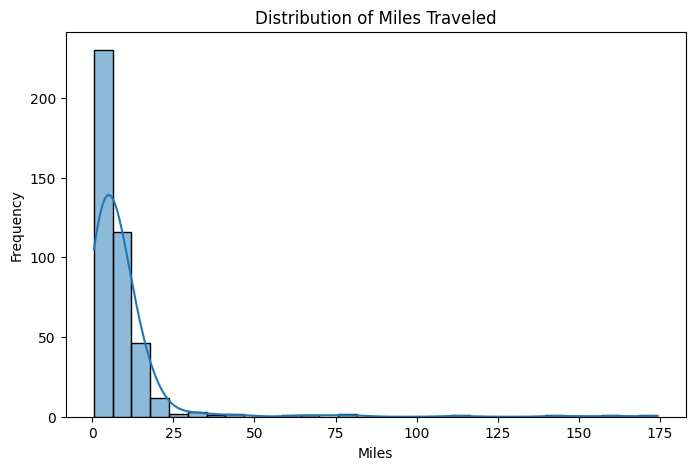

In [30]:
# Distribution of Miles Traveled
plt.figure(figsize=(8, 5))
sns.histplot(df["MILES"], bins=30, kde=True)
plt.title("Distribution of Miles Traveled")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

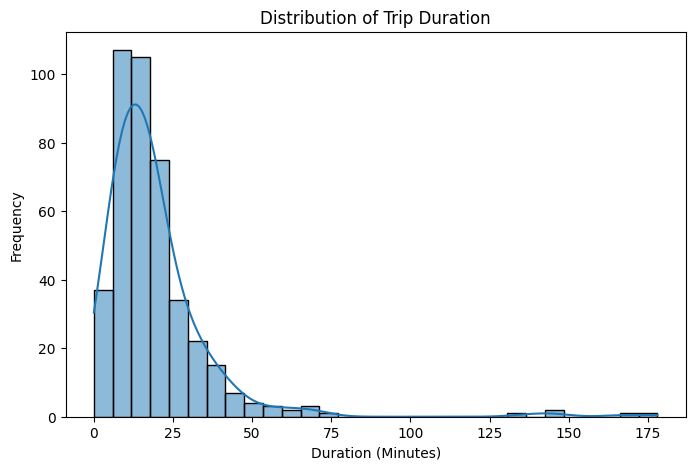

In [31]:
# Distribution of Trip Duration
plt.figure(figsize=(8, 5))
sns.histplot(df["TRIP_DURATION"], bins=30, kde=True)
plt.title("Distribution of Trip Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

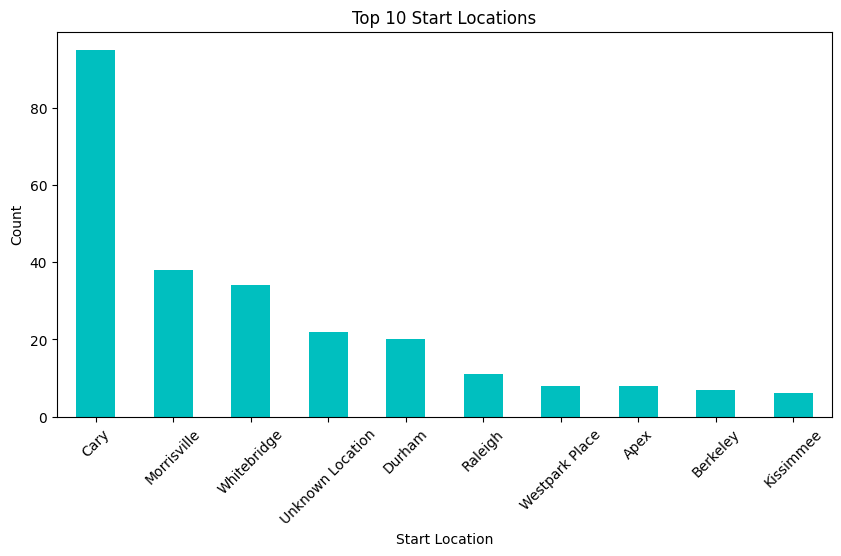

In [32]:
# Top 10 most common start locations
plt.figure(figsize=(10, 5))
df["START"].value_counts().head(10).plot(kind="bar", color="c")
plt.title("Top 10 Start Locations")
plt.xlabel("Start Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

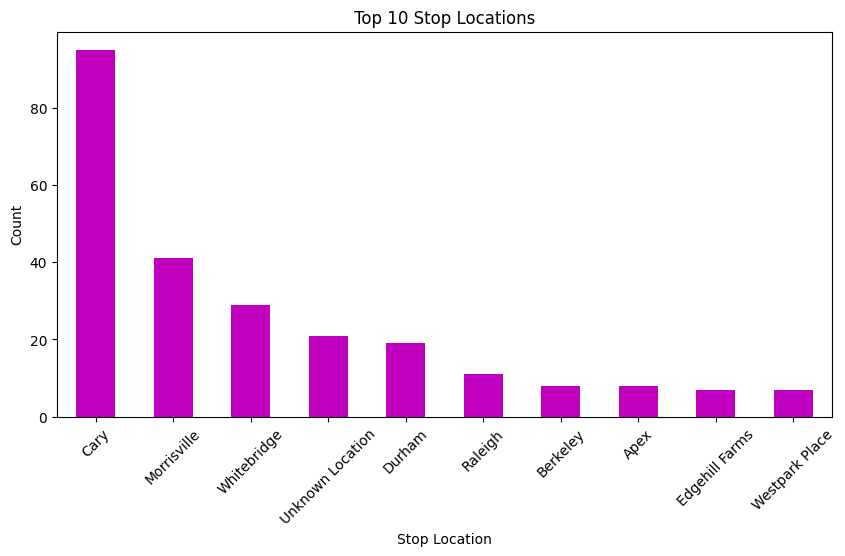

In [33]:
# Top 10 most common stop locations
plt.figure(figsize=(10, 5))
df["STOP"].value_counts().head(10).plot(kind="bar", color="m")
plt.title("Top 10 Stop Locations")
plt.xlabel("Stop Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

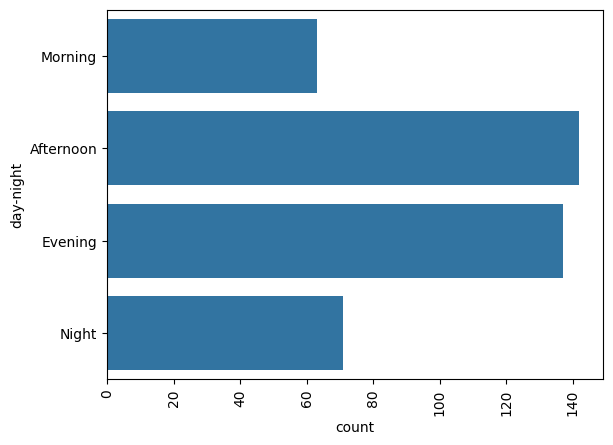

In [34]:

sns.countplot(df['day-night'])
plt.xticks(rotation=90)

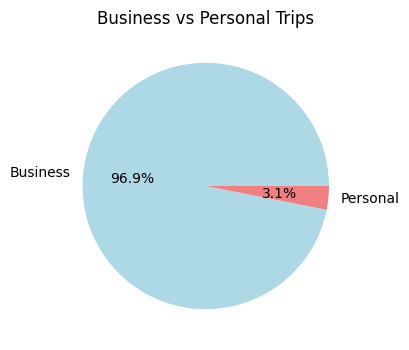

In [35]:
# Business vs Personal trips
plt.figure(figsize=(6, 4))
df["CATEGORY"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Business vs Personal Trips")
plt.ylabel("")
plt.show()

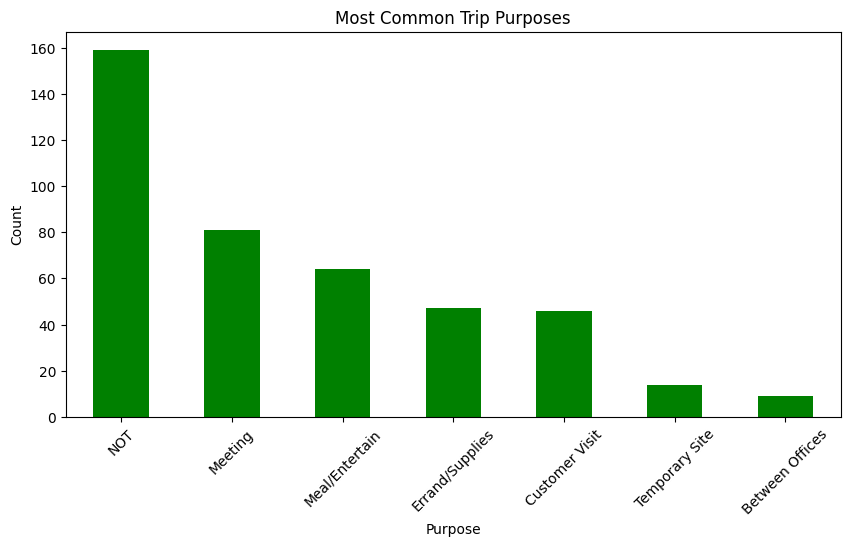

In [36]:
# Most common trip purposes
plt.figure(figsize=(10, 5))
df["PURPOSE"].value_counts().head(10).plot(kind="bar", color="g")
plt.title("Most Common Trip Purposes")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

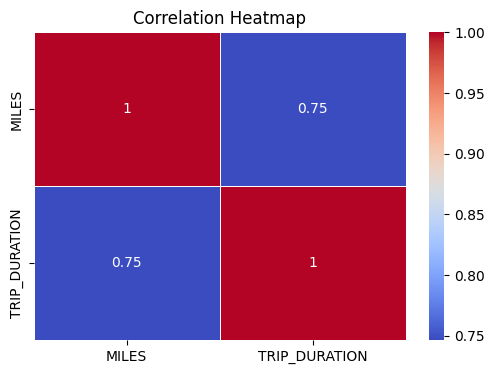

In [37]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[["MILES", "TRIP_DURATION"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


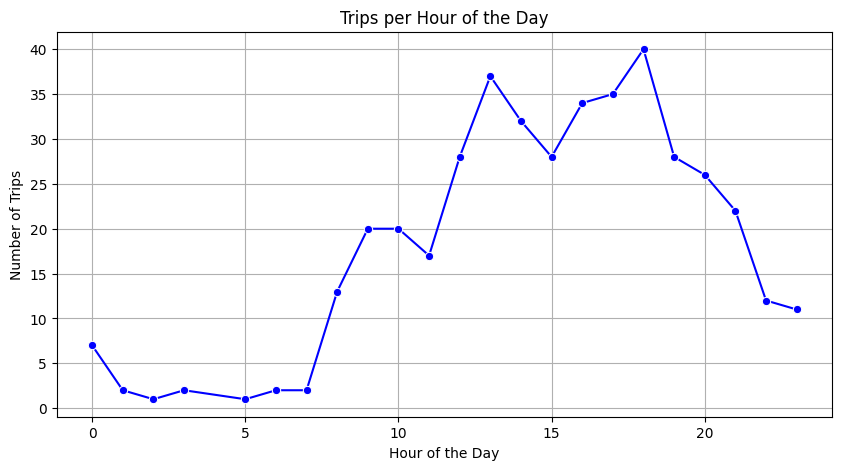

In [39]:
# Extract Date Components
df["DAY_OF_WEEK"] = df["START_DATE"].dt.day_name()
df["HOUR"] = df["START_DATE"].dt.hour
df["MONTH"] = df["START_DATE"].dt.month_name()

#identify rush hours
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby("HOUR")["MILES"].count(), marker="o", color="b")
plt.title("Trips per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.grid()
plt.show()


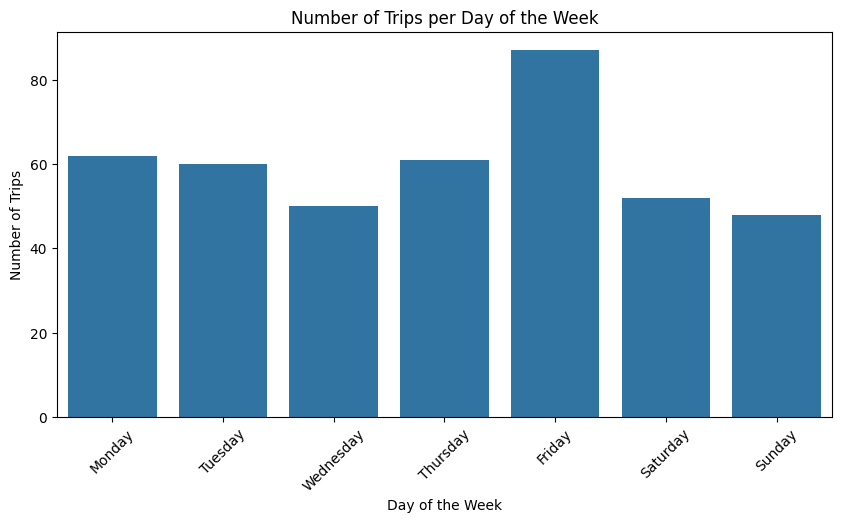

In [40]:
# Trips per day of the week
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="DAY_OF_WEEK", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Number of Trips per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()


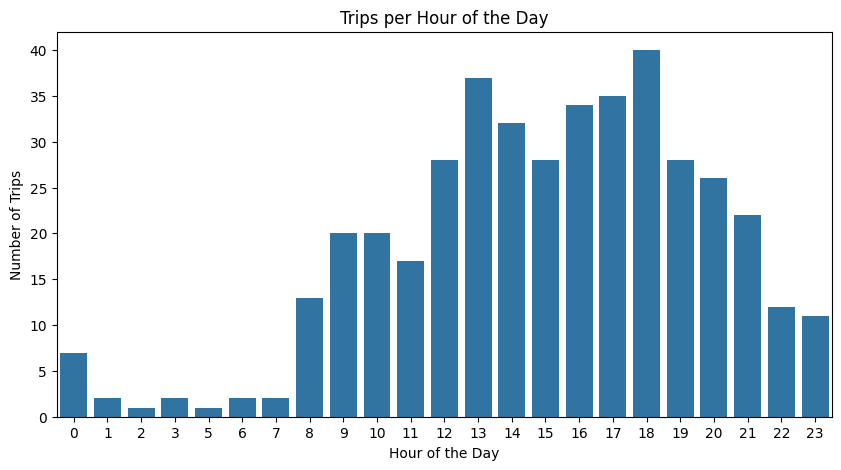

In [41]:
# Trips per hour
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="HOUR")
plt.title("Trips per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.show()

Find Busiest Days for Travel

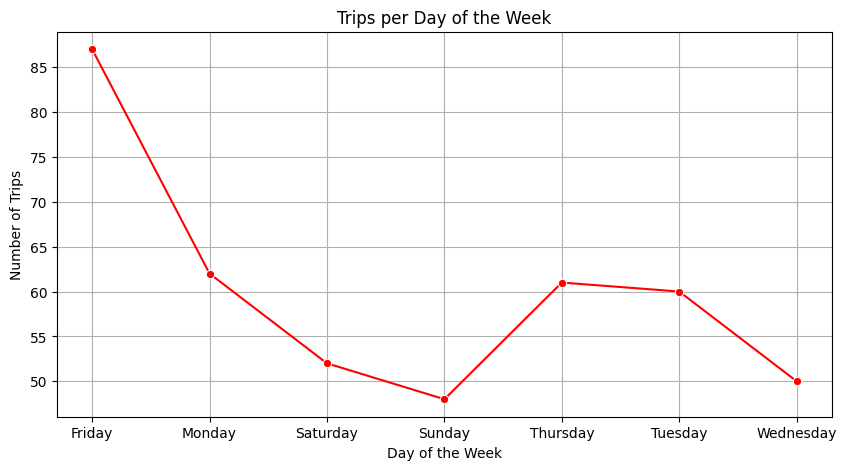

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby("DAY_OF_WEEK")["MILES"].count(), marker="o", color="r")
plt.title("Trips per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.grid()
plt.show()

Short vs. Long-Distance Trips

<ipython-input-43-9f9b1b0f1d5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="CATEGORY", y="MILES", palette="coolwarm")


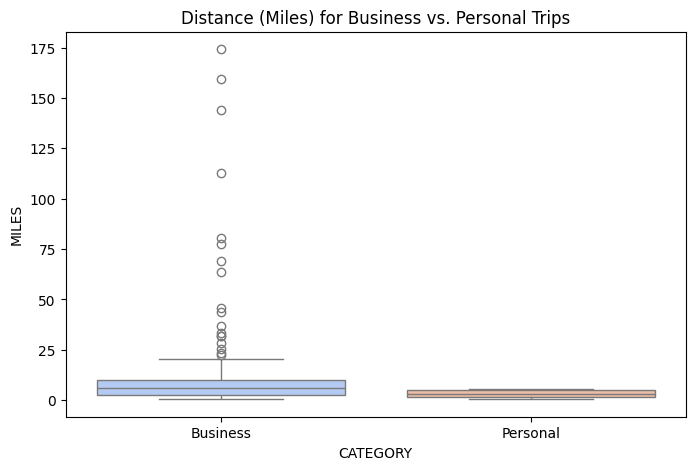

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="CATEGORY", y="MILES", palette="coolwarm")
plt.title("Distance (Miles) for Business vs. Personal Trips")
plt.show()


Do People Travel More on Weekdays or Weekends?

<ipython-input-44-1883da394959>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="DAY_OF_WEEK", y="MILES", estimator=sum, palette="Blues")


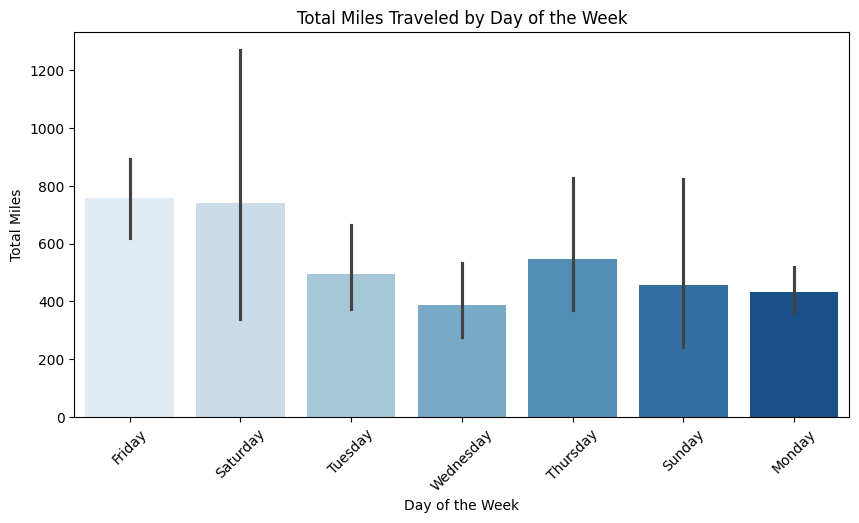

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="DAY_OF_WEEK", y="MILES", estimator=sum, palette="Blues")
plt.title("Total Miles Traveled by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Miles")
plt.xticks(rotation=45)
plt.show()


Top 10 Most Frequent Routes


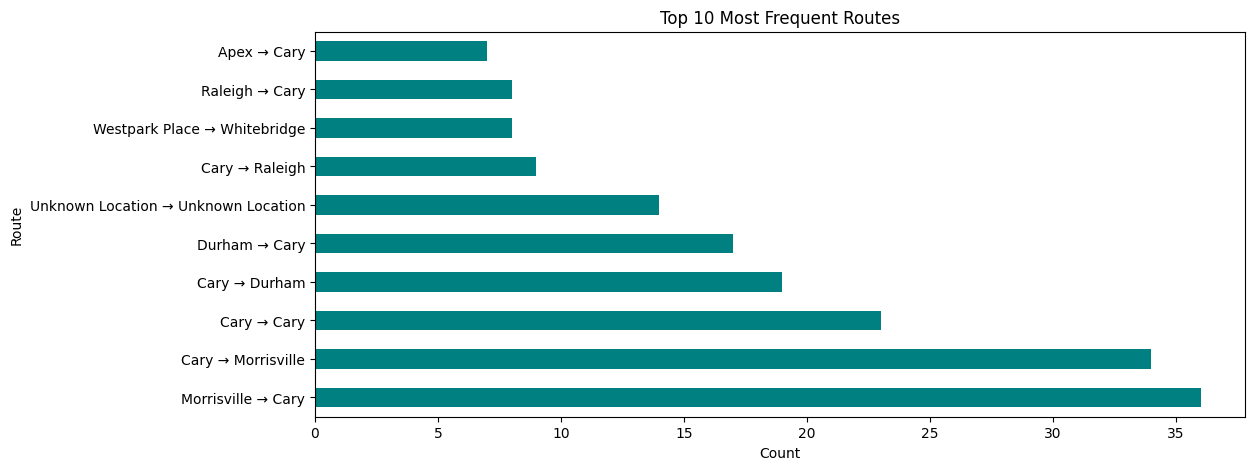

In [45]:
df["ROUTE"] = df["START"] + " → " + df["STOP"]
plt.figure(figsize=(12, 5))
df["ROUTE"].value_counts().head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Most Frequent Routes")
plt.xlabel("Count")
plt.ylabel("Route")
plt.show()


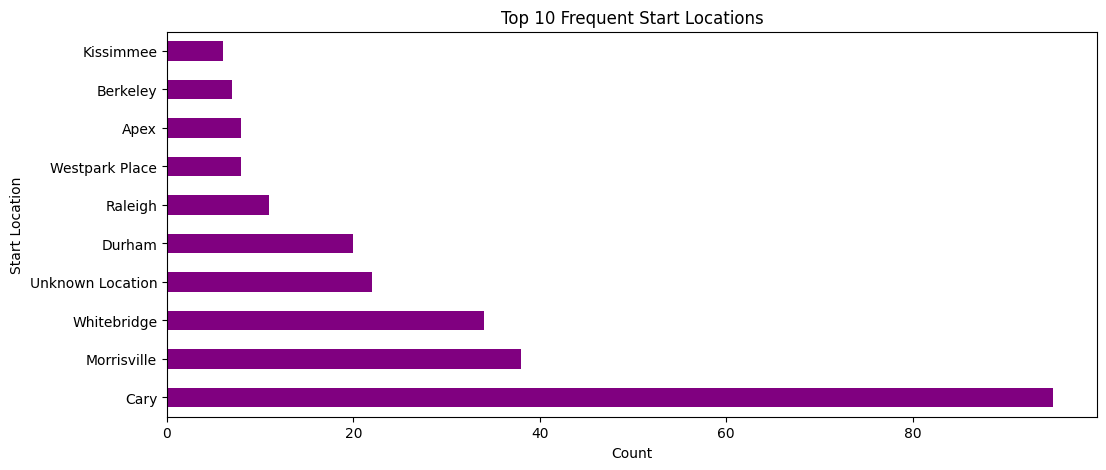

In [46]:
plt.figure(figsize=(12, 5))
df["START"].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Frequent Start Locations")
plt.xlabel("Count")
plt.ylabel("Start Location")
plt.show()


Do Longer Trips Take Proportionally More Time?

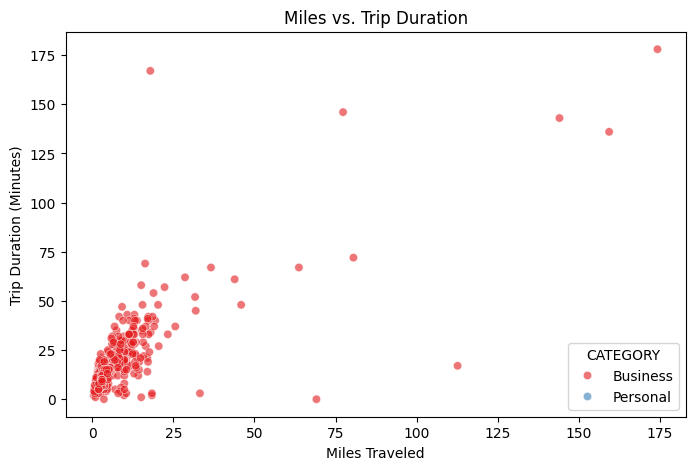

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="MILES", y="TRIP_DURATION", hue="CATEGORY", alpha=0.6, palette="Set1")
plt.title("Miles vs. Trip Duration")
plt.xlabel("Miles Traveled")
plt.ylabel("Trip Duration (Minutes)")
plt.show()


Anomaly Detection (Unusual Trips).
Detect Extremely Long Trips (Potential Outliers)



In [48]:
# Identify trips above the 95th percentile in distance
long_trips = df[df["MILES"] > df["MILES"].quantile(0.95)]
print(long_trips[["START", "STOP", "MILES", "TRIP_DURATION", "PURPOSE"]])


                START              STOP  MILES  TRIP_DURATION          PURPOSE
4         Fort Pierce   West Palm Beach   63.7           67.0   Customer Visit
23               Cary       Chapel Hill   19.4           40.0   Customer Visit
24        Chapel Hill              Cary   23.3           33.0   Customer Visit
107           Orlando         Kissimmee   20.3           48.0          Meeting
111         Kissimmee     Daytona Beach   77.3          146.0   Customer Visit
112     Daytona Beach      Jacksonville   80.5           72.0   Customer Visit
113      Jacksonville         Ridgeland  174.2          178.0   Customer Visit
114         Ridgeland          Florence  144.0          143.0          Meeting
115          Florence              Cary  159.3          136.0          Meeting
149     San Francisco         Palo Alto   20.5           27.0  Between Offices
154            Newark     San Francisco   25.6           37.0          Meeting
180           Jamaica          New York   22.3      

Trip purpose

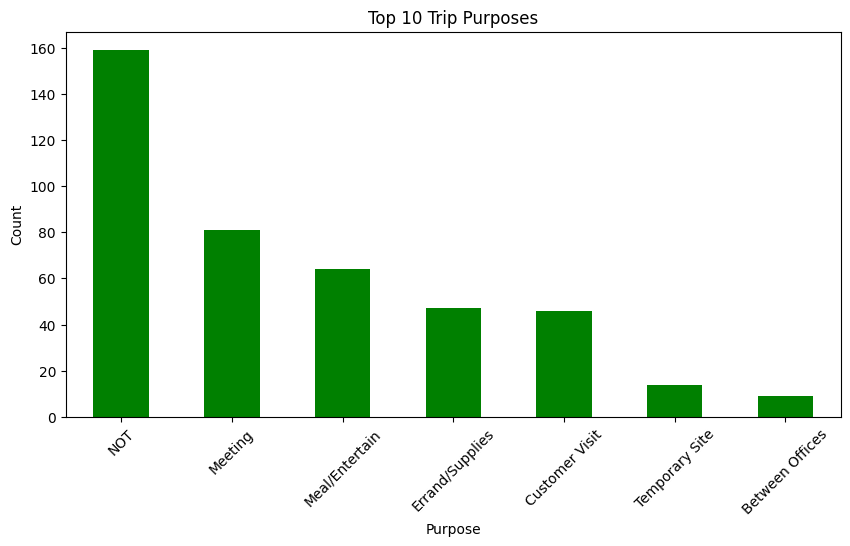

In [49]:
plt.figure(figsize=(10, 5))
df["PURPOSE"].value_counts().head(10).plot(kind="bar", color="green")
plt.title("Top 10 Trip Purposes")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Time Series Analysis (Trip Trends Over Time)
📈 Monthly Trend in Number of Trips

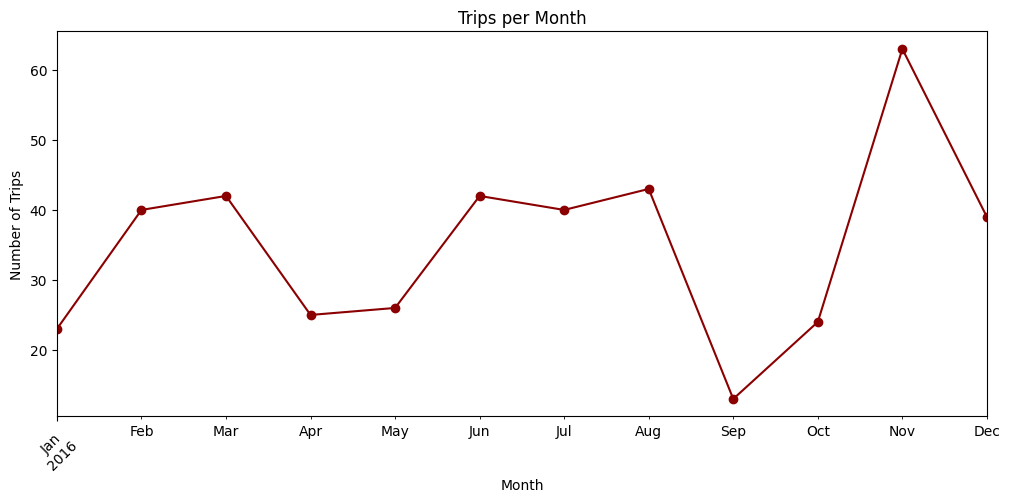

In [50]:
df["YEAR_MONTH"] = df["START_DATE"].dt.to_period("M")  # Extract Year-Month
plt.figure(figsize=(12, 5))
df.groupby("YEAR_MONTH")["MILES"].count().plot(marker="o", color="darkred")
plt.title("Trips per Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()
